# Iris Dataset Case Study

## Hello World of Machine Learning: Classification of Iris Flowers
Welcome to Machine Learning! 

The Iris Dataset is one of the most famous datasets in the machine learning community. This dataset consists of the physical parameters of three species of flower — Versicolor, Setosa and Virginica. The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length. 

In this excercise, we'll predict the species of the flowers based on these parameters. The data consists of continuous numeric values which describe the dimensions of the respective features. We will be training the model based on these features.

## What makes this excercise doable:
* Attributes are numeric
* This classification problem introduces fundamental supervised learning algorithms
* It only has 4 attributes and 150 rows - small, easy to explore, and not memory intensive
* All numeric attributes are of the same unit scale, not requiring any special scaling or transformations

## Summary:
#### In this step-by-step tutorial you will:
* Download and install Python SciPy and get the most useful package for machine learning in Python.
* Load a dataset and understand it’s structure using statistical summaries and data visualization.
* Create 6 machine learning models, pick the best and build confidence that the accuracy is reliable.


## 1. Create a virtual env and install libraries
Pro tip: if you're using this in binder, your environment is already setup!
* scipy
* numpy
* matplotlib
* pandas
* sklearn
* seaborn

In [1]:
! pip install --upgrade pip
! pip install -r binder/requirements.txt

Requirement already up-to-date: pip in /home/nbuser/anaconda3_420/lib/python3.5/site-packages (20.0.2)


In [2]:
from pandas import *
from matplotlib import *
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## 2. Load the data and import the libraries
Pro tip: the sklearn library 
`import seaborn as sns
iris = sns.load_dataset('iris')`

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 3. Summarize the Dataset
1. Dimensions of the dataset.
2. Checkout the first 20 rows.
3. Statistical summary of all attributes.
4. Breakdown of the data by the class variable.

This is relatively a very small data set with 150 samples. Since the dataframe has four features (Sepal length, sepal width, petal length and petal width) with 150 samples belonging to either of the three target classes, our matrix will be:

In [4]:
# dimensions/shape
iris.shape

(150, 5)

In [5]:
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Now going into the mathematics of the dataset, let us find out the standard deviation, mean, minimum value and the four quartile percentile of the data.

In [6]:
iris.describe()
# this output shows we're working with the same scale (centimeters)
# and similar ranges between 0 and 8 centimeters

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.groupby('species').size()
# each species has 50 instances/rows (33% of the dataset)

species
setosa        50
versicolor    50
virginica     50
dtype: int64

## 4. Analysing the Data Visually
1. Univariate plots to better understand each attribute.
2. Multivariate plots to better understand the relationships between attributes.

### 4.1 Univariate plots
Let us look at the box plot of the dataset, which shows us the visual representation of how our data is scattered over the the plane. Box plot is a percentile-based graph, which divides the data into four quartiles of 25% each. This method is used in statistical analysis to understand various measures such as mean, median and deviation

sepal_length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

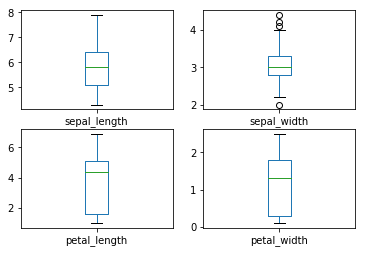

In [8]:
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

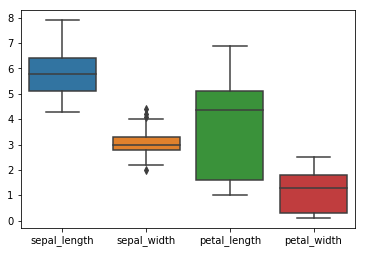

In [9]:
sns.boxplot(data=iris)

### Multivariate plots to better understand the relationships between attributes
To understand how each feature accounts for classification of the data, we can build a scatter plot which shows us the correlation with respect to other features. This method helps just to figure out the important features which account the most for the classification in our model.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe68c5e3978>,
      dtype=object)

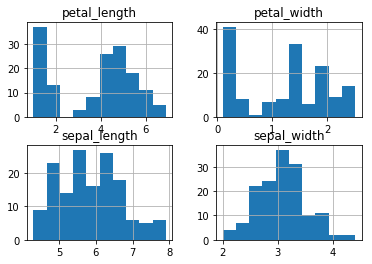

In [10]:
iris.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe68c4f98d0>,
      dtype=object)

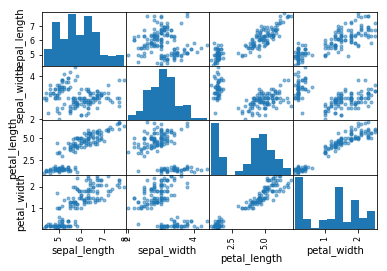

In [11]:
scatter_matrix(iris)

## 5. Evaluate Some Algorithms
1. Separate out a validation dataset.
	We will split the loaded dataset into two, 80% of which we will use to train, 	evaluate and select among our models, and 20% that we will hold back as a 	validation dataset.
2. Setup the test harness to use 10-fold cross validation.
3. Build multiple different models to predict species from flower measurements
4. Select the best model.

#### 5.1 Subsetting our data
As mentioned, in statistics and machine learning we usually split our data into two subsets: training data and testing data (and sometimes to three: train, validate and test), and fit our model on the train data, in order to make predictions on the test data. When we do that, one of two thing might happen: we overfit our model or we underfit our model. 

overfitting: Overfitting means that model we trained has trained “too well” and is now, well, fit too closely to the training dataset. This usually happens when the model is too complex (i.e. too many features/variables compared to the number of observations). This model will be very accurate on the training data but will probably be very not accurate on untrained or new data.

underfitting: In contrast to overfitting, when a model is underfitted, it means that the model does not fit the training data and therefore misses the trends in the data. It also means the model cannot be generalized to new data. This is usually the result of a very simple model (not enough predictors/independent variables). It could also happen when, for example, we fit a linear model (like linear regression) to data that is not linear. 

![Model Fit](https://miro.medium.com/max/1110/1*tBErXYVvTw2jSUYK7thU2A.png)

In [12]:
# create training and testing vars
array = iris.values
# excluding the species column, this is what we're predicting!
X = array[:,0:4]
# y is the dependent variable, species
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, 
                                y, test_size=0.20, random_state=1)
print(X_train.shape, Y_train.shape)
print(X_validation.shape, Y_validation.shape)

(120, 4) (120,)
(30, 4) (30,)


### 5.2 k-fold cross-validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
- Take the group as a hold out or test data set
- Take the remaining groups as a training data set
- Fit a model on the training set and evaluate it on the test set
- Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

### 5.3 k-fold cross-validation
We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s test 6 different algorithms:
- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN).
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

In [13]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.955909 (0.044337)
LDA: 0.975641 (0.037246)
KNN: 0.950524 (0.040563)
CART: 0.951166 (0.052812)
NB: 0.951166 (0.052812)
SVM: 0.983333 (0.033333)


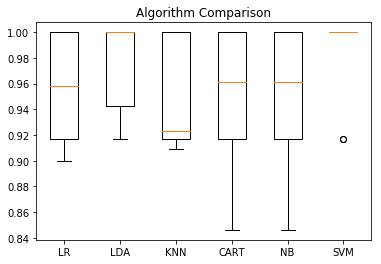

In [14]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

#### 6.1 Make Predictions
At this stage, we've tested 6 algorithms and seemed to predict with the highest accuracy. We'll fit the model on the training dataset to make predictions on the validation dataset. 

In [15]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

#### 6.2 Evaluate Predictions

In [16]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        11
 versicolor       1.00      0.92      0.96        13
  virginica       0.86      1.00      0.92         6

avg / total       0.97      0.97      0.97        30



The model performed with ~97% accuracy!